In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
customer=pd.read_csv("customer.csv")
sales=pd.read_csv("sales.csv")
products=pd.read_csv("products.csv")
df2=sales.merge(products, on='product_id', how='left')
df=df2.merge(customer, on='customer_id', how='left')

In [2]:
sales

,serial_number,order_id,order_date,delivery_date,time_of_order,time_of_delivery,delivery_mode,sales_agent,payment_mode,delivery_rating,product_id,customer_id,sales,quantity,percent_discount,profit
0,4720,D-94655-11910,03-01-2019,07-01-2019,10:50 AM,5:12 PM,Standard Class,Robert Paige,Debit Card,2,CTM-0236,SVA-9020,2.214,3,70,-1.4760
1,428,D-75151-11913,04-01-2019,08-01-2019,1:27 PM,3:52 PM,Standard Class,Chris Jr,Debit Card,1,FMB-0558,CTH-7225,41.376,6,20,3.1032
2,429,C-55852-11913,04-01-2019,08-01-2019,1:12 PM,5:23 PM,Standard Class,Tom Renner,Credit card,1,EWB-0800,BON-8789,153.360,9,0,70.5456
3,1041,D-13194-11912,05-01-2019,12-01-2019,12:17 PM,10:11 AM,Standard Class,Robert Hemsworth,Debit Card,2,PWP-0162,CTH-7225,21.184,1,20,4.7664
4,4229,C-26707-11916,06-01-2019,07-01-2019,4:36 PM,1:41 PM,First Class,John Wick,Cash,2,AWP-0964,QMS-4194,66.540,6,0,32.6046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,525,C-74298-122213,30-12-2022,03-01-2023,1:04 PM,5:06 PM,Standard Class,Chris Jr,Credit card,1,AKW-0339,NML-9691,7.410,3,0,3.4827
5904,526,B-97964-122217,30-12-2022,03-01-2023,5:03 PM,9:47 AM,Standard Class,John McCarthy,Bank Transfer,2,ZMB-0617,AOC-1212,2.628,2,70,-1.9272
5905,769,C-80149-122215,30-12-2022,03-01-2023,3:37 PM,4:45 PM,Standard Class,John McCarthy,Cash,1,UMG-0304,TDW-7010,59.700,3,0,26.8650
5906,770,B-91948-122212,30-12-2022,03-01-2023,12:10 PM,2:02 PM,Standard Class,Chris Jr,Bank Transfer,1,AWW-0008,TCL-6528,3.392,1,20,0.8056


Text(0, 0.5, 'State')

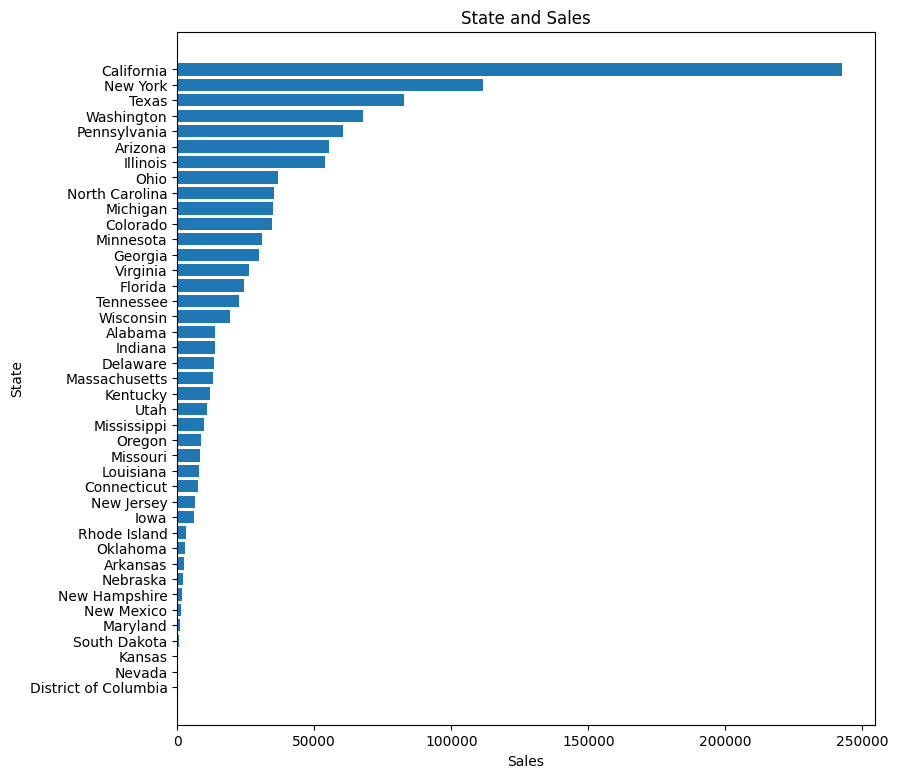

In [3]:
sale_state=df.groupby(df['state'])['sales'].sum().reset_index()
sale_state=sale_state.sort_values(by=['sales'],ascending=True)
plt.figure(figsize=(9,9))
plt.barh(sale_state['state'], sale_state['sales'])
plt.title('State and Sales')
plt.xlabel('Sales')
plt.ylabel('State')

In [4]:
category=df.loc[:,['category','sales']]
sale_category=category.groupby('category').sum()
sale_category

,sales
category,
Accessories,160126.2459
Clothing,426379.4489
Shoes,530436.9265


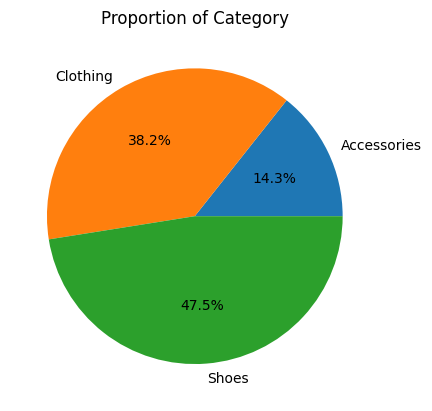

In [5]:
plt.pie(sale_category['sales'], labels=sale_category.index, autopct='%1.1f%%')
plt.title('Proportion of Category')
plt.show()

In [6]:
payment_mod=df.loc[:,['payment_mode','quantity']]
payment_mod=payment_mod.groupby('payment_mode').sum().reset_index()
payment_mod

,payment_mode,quantity
0,Bank Transfer,5699
1,Cash,5649
2,Credit card,5570
3,Debit Card,5666


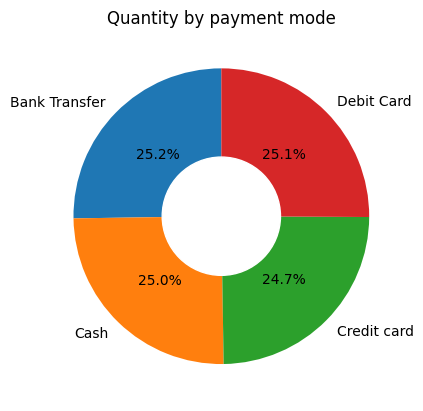

In [7]:
fig, ax = plt.subplots()
label = payment_mod['payment_mode']
size= payment_mod['quantity']
ax.pie(size, labels=label, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.7})
circle=plt.Circle((0,0),0.4,color='white')
ax.add_artist(circle)
plt.title('Quantity by payment mode')
plt.show()

In [8]:
customer=df.loc[:,['customer_name','customer_id','quantity']]
customer=customer.groupby(['customer_name','customer_id']).sum().reset_index()
customer=customer.sort_values(['quantity'],ascending=False).head(10)
customer

,customer_name,customer_id,quantity
784,William Brown,WPP-4399,93
257,Emily Phan,EIC-1982,91
571,Noel Staavos,NIC-1732,84
247,Edward Hooks,ENW-6578,82
486,Maribeth Schnelling,MMD-7588,82
592,Paul Prost,PGS-5039,79
384,John Lee,JCM-4112,79
143,Chloris Kastensmidt,CPP-8584,77
710,Steven Cartwright,SDW-9345,77
600,Pete Kriz,PWM-6328,77


<function matplotlib.pyplot.show(close=None, block=None)>

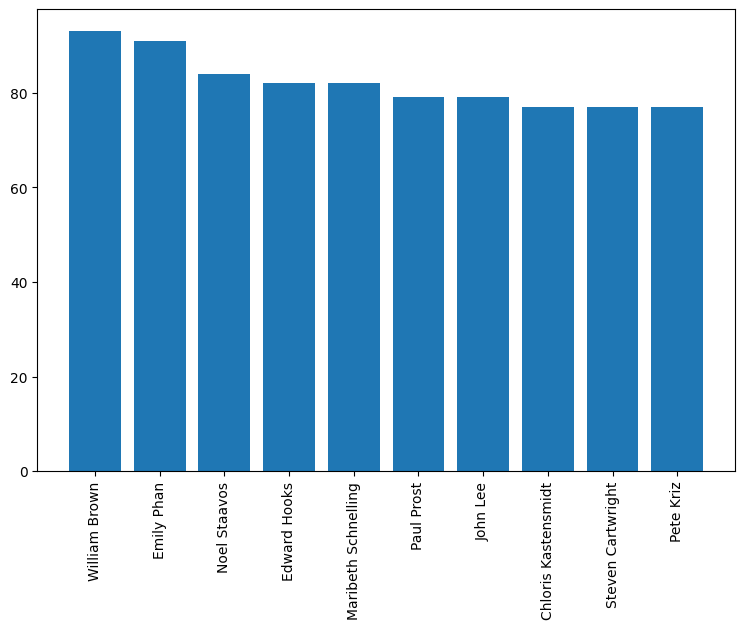

In [9]:
plt.figure(figsize=(9,6))
plt.bar(customer['customer_name'],customer['quantity'])
plt.xticks(rotation=90)
plt.title=('Top 10 customers has the most quantity')
plt.show

In [10]:
data_ny=df.loc[df['state']=="New York"]
data_ny=data_ny.loc[:,['category','sub_category','quantity']]
data_ny=data_ny.groupby(['category','sub_category']).sum().reset_index()
sub_rank=data_ny.sort_values(['category','quantity'],ascending=False).groupby('category').head(4)
print('The top 4 subcategories for each category, ranked by total quantity')
print(sub_rank)

The top 4 subcategories for each category, ranked by total quantity
       category           sub_category  quantity
18        Shoes            Women/Shoes       531
13        Shoes              Men/Shoes       430
12        Shoes             Kids/Shoes       156
14        Shoes        Originals/Shoes        73
10     Clothing         Women/Clothing       440
8      Clothing           Men/Clothing       345
7      Clothing          Kids/Clothing        57
6      Clothing    Essentials/Clothing         7
2   Accessories  Originals/Accessories       208
4   Accessories   Training/Accessories        51
5   Accessories      Women/Accessories        43
1   Accessories        Men/Accessories        27


<AxesSubplot:xlabel='sub_category'>

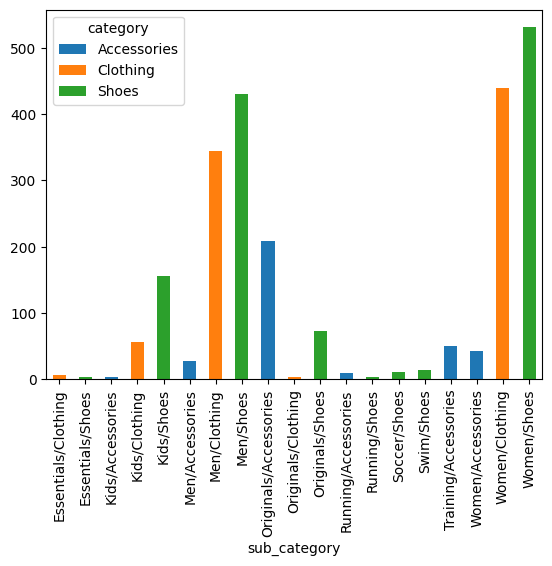

In [11]:
data_ny=data_ny.pivot(index='sub_category', columns='category', values='quantity')
data_ny.plot(kind='bar', stacked=True)

In [12]:
filter_profit = df.loc[(df['delivery_mode']=='Standard Class') &(df['order_date']>='01-01-2019')&(df['order_date']<='30-06-2019')]
filter_profit = filter_profit.groupby(['category'])['profit'].sum().idxmax()
sale_by_brand=df.loc[df['category'] == filter_profit].groupby(['brand_name'])['sales'].sum().reset_index()
sale_by_brand = sale_by_brand.sort_values(['sales'],ascending=False).head(2)
print('top 2 brand name has the most sales')
print(sale_by_brand)

top 2 brand name has the most sales
  brand_name        sales
1     adidas  281357.5295
0       Nike  145021.9194


In [13]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')
monthly_sales = sales.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()


TypeError: 'str' object is not callable

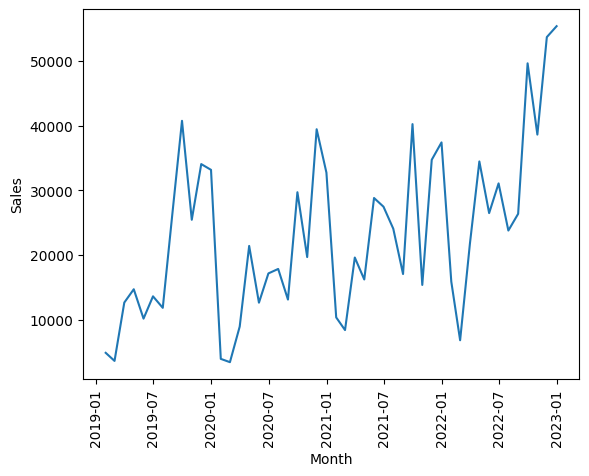

In [14]:
plt.plot(monthly_sales['order_date'], monthly_sales['sales'])
plt.xlabel('Month') 
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

In [15]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%d-%m-%Y')
order_date=sales.loc[:,['order_date','sales']]
order_date=order_date.groupby(['order_date'])['sales'].sum().reset_index()
order_date=order_date.sort_values(['order_date'],ascending=True)
print(order_date)

     order_date     sales
0    2019-01-03     2.214
1    2019-01-04   194.736
2    2019-01-05    21.184
3    2019-01-06   254.440
4    2019-01-07    43.260
...         ...       ...
1247 2022-12-26    51.750
1248 2022-12-27   128.058
1249 2022-12-28  1100.668
1250 2022-12-29  2291.884
1251 2022-12-30   185.650

[1252 rows x 2 columns]
